# The main task is looking for dependation between 3 data type: average month temperature and month number vs. month electricity energy usage.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
energy = pd.read_csv('elusage.csv', index_col = False)

In [49]:
energy.head(10)

,average_temperature,month,average_electricity_usage
0,73,8,24.828
1,67,9,24.688
2,57,10,19.310
3,43,11,59.706
4,26,12,99.667
5,41,1,49.333
6,38,2,59.375
7,46,3,55.172
8,54,4,55.517
9,60,5,25.938


### Getting informations about DataFrame (e.g. inproper/missing values and types of data used)

In [50]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   average_temperature        55 non-null     int64  
 1   month                      55 non-null     int64  
 2   average_electricity_usage  55 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


#### **There are no missing values and all of them are numeric types**

### After DataFrame was made and check we need to give it as simple form as possible, so we will make column names shorter by removing useless `'average_'` substring (we know that every number in these 2 columns are the average values calculated from many observations taken during every month).

In [51]:
energy = energy.rename(columns={'average_temperature': 'temperature',
                                'average_electricity_usage': 'electricity_usage'})
energy.head()

,temperature,month,electricity_usage
0,73,8,24.828
1,67,9,24.688
2,57,10,19.310
3,43,11,59.706
4,26,12,99.667


---

## Global plot settings as a function

In [52]:
def global_plot_sets():
    plt.rc('xtick', color = 'k', labelsize = 18)
    plt.rc('ytick', color = 'k', labelsize = 18)
    plt.rc('axes', labelsize = 24, labelpad = 18, titlepad = 12,
           titlesize = 28, facecolor = '#CDCCC9', axisbelow = 'True')
    plt.rc('grid', color = 'w', linestyle = '-.', linewidth = 0.75)
    plt.rc('legend', facecolor = 'w', fontsize = 16)
    plt.rc('xtick.major', size = 8, width = 1)
    plt.rc('xtick.minor', size = 5, width = 1)
    plt.rc('ytick.major', size = 8, width = 1)
    plt.rc('ytick.minor', size = 5, width = 1)

## Plots displaying dependancy between measured data

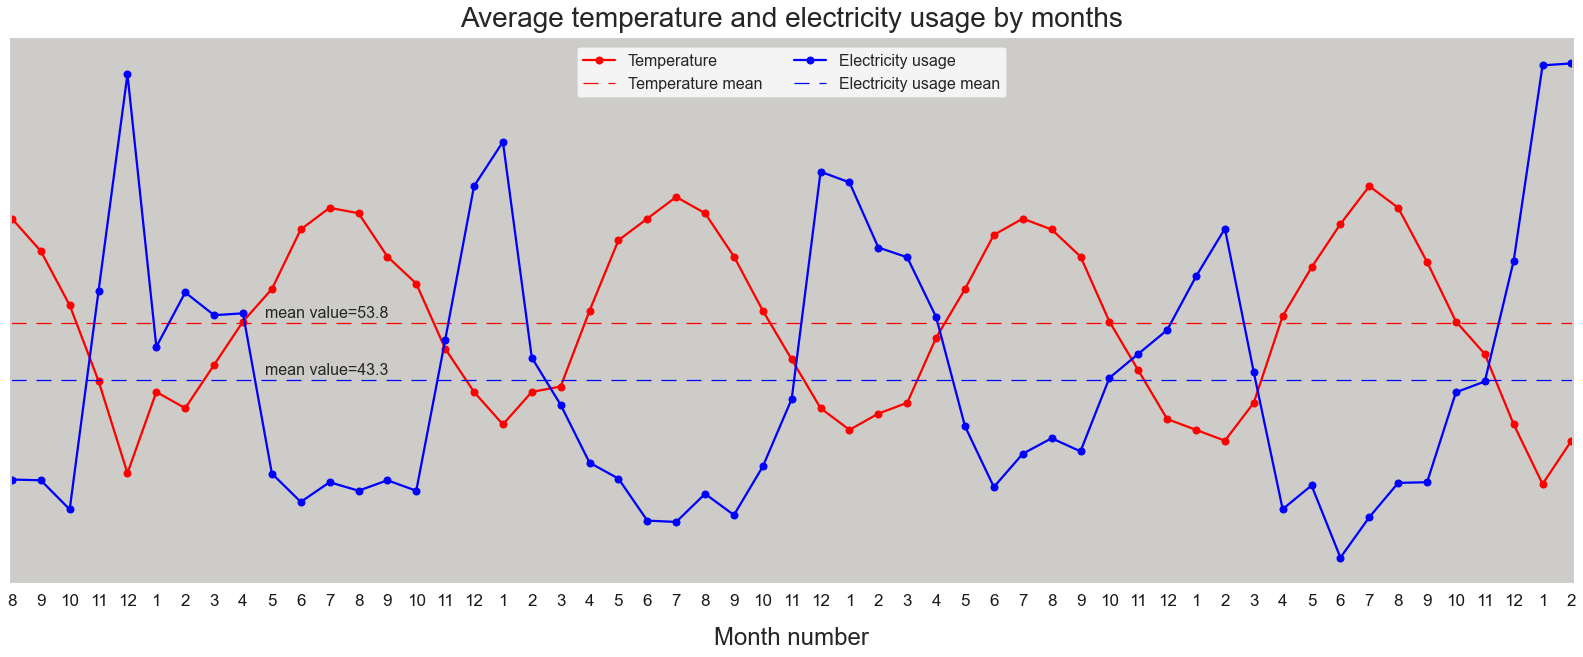

In [53]:
global_plot_sets()

plt.figure(figsize=(28, 10))

x_range = np.arange(1, energy.shape[0] + 1)
xticks_range = energy['month'].values
cols_list = ['temperature', 'electricity_usage']
colors_name = ['red', 'blue']

for col_name, colors in zip(cols_list, colors_name):
    # Change column list into strings: 'Temperature', 'Electricity usage'
    label_name = ' '.join(str.capitalize(col_name).split('_'))
    mean = np.mean(energy[col_name])

    plt.plot(x_range, energy[col_name], c=colors,
             marker='o', markersize=7, label=label_name)
    plt.axhline(y=mean, color=colors,
                ls=(0, (12, 8)), lw=1.25, label=f"{label_name} mean")
    plt.text(9.75, mean+1, f"mean value={str(round(mean, 1))}",
             fontdict={'fontsize': 16})

plt.xlabel('Month number')
plt.xlim(x_range.min()-0.05, x_range.max()+0.05)
plt.xticks(x_range, xticks_range, fontsize=17)
plt.yticks([]) ## Labels replaced by the legend
plt.grid([])   ## no grid makes plot easier to read
plt.title('Average temperature and electricity usage by months')
plt.legend(loc='upper center', ncol=2)  ## legend descriptions is too high

plt.show()

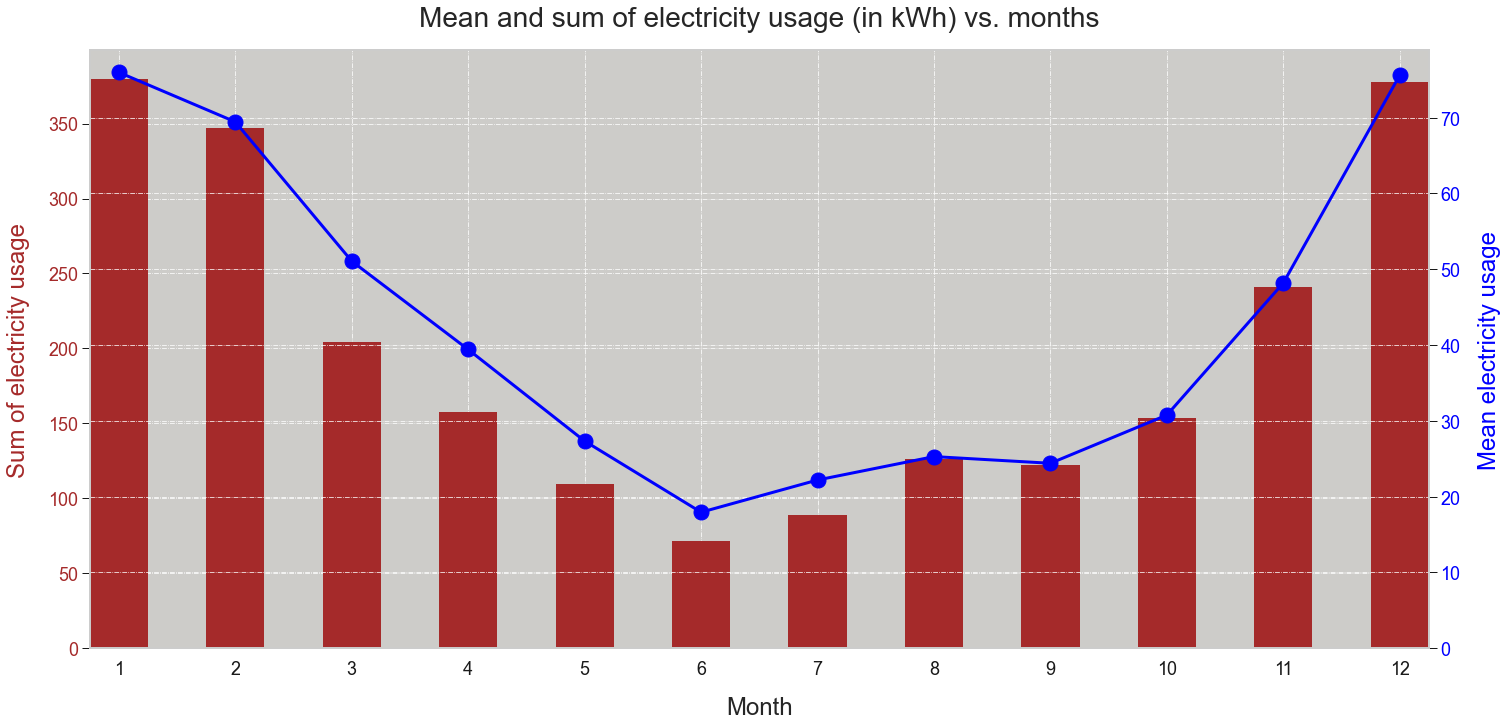

In [54]:
fig, ax1 = plt.subplots(figsize=(24, 11))
ax2 = ax1.twinx()

# Mean and sum values for every month of the year
months_mean_energy_used = energy.groupby('month')['electricity_usage'].mean()
months_sum_energy_used = energy.groupby('month')['electricity_usage'].sum()

month_number = months_sum_energy_used.keys()
w = 0.5   # bar width

ax1.bar(month_number, months_sum_energy_used, width = w, color = 'brown', linewidth=0)
ax2.plot(month_number, months_mean_energy_used, color = 'blue', linewidth=3, marker='o', markersize=15)
ax1.set_xlabel('Month')
ax1.set_ylabel('Sum of electricity usage', color='brown')
ax1.set_xlim((min(month_number)-0.5*w, max(month_number)+0.5*w))
ax1.tick_params(axis='y', labelcolor='brown')
ax1.set_xticks(month_number)    
ax2.set_ylabel('Mean electricity usage', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(ymin=0)
plt.title('Mean and sum of electricity usage (in kWh) vs. months', y=1.02)

plt.show()

---

# **Statistics for data set**

### Looking for **Pearson** and **Spearman** correlations

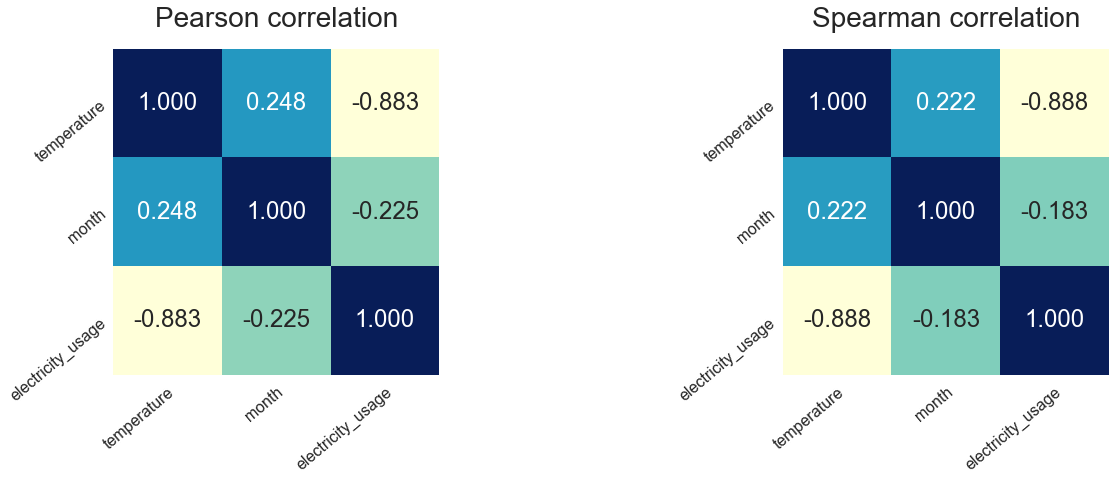

In [55]:
sns.set()

# Draw a heatmap with the numeric values in each cell
fig = plt.figure(figsize=(22, 6))

ax_ = [fig.add_subplot(1, 2, pos) for pos in [1,2]]
correlation_data = [energy.corr(method = option) for option in ['pearson', 'spearman']]
titles_array = ['Pearson correlation', 'Spearman correlation']

# We use 'axs' parameter to tell seaborn which subplot to use for each plot
for axs, data, titles in zip(ax_, correlation_data, titles_array):
    sns.heatmap(data = data, square = True, cmap = "YlGnBu", cbar=False,
                fmt = '.3f', annot = True, annot_kws = {"fontsize": 24}, ax = axs)
    axs.set_xticklabels(ax_[0].get_xticklabels(), fontsize = 16,
                        rotation = 40, ha = "right", rotation_mode = "anchor")
    axs.set_yticklabels(ax_[0].get_xticklabels(), fontsize = 16,
                        rotation = 40, ha = "right", rotation_mode = "anchor")
    axs.set_title(titles, fontsize = 28, y=1.03)
    
plt.show()

## **Conclusions:** 
#### - `'month'` vs. `'electricity usage'` do not have enough strong linear and non-linear correlations, although plot show their cyclical (seasonal) dependancy,
#### - `'temperature'` and `'electricity_usage'` have got strong ***Spearman correlation***, so regression will be made using linear algorythms and with decision tree.

## Compare basic stats for `'temperature'` and `'electricity_usage'` data

<Figure size 432x288 with 0 Axes>

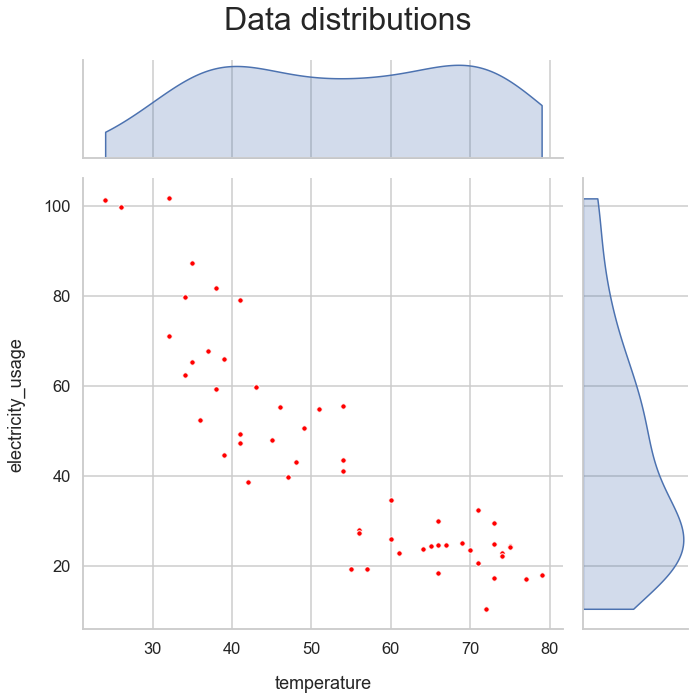

In [56]:
sns.set_style('whitegrid')
sns.set_context("talk")
plt.figure()

g = sns.JointGrid(data=energy, x='temperature', y='electricity_usage', height=10, ratio=4)
g.plot_joint(sns.scatterplot, alpha=1, color="red", linewidth=1, s=30)
g.plot_marginals(sns.kdeplot, shade=True, cut=0)
sns.despine()
g.fig.suptitle('Data distributions', fontsize=32)
g.fig.subplots_adjust(top=0.88) # Reduce plot to make room
g.fig.tight_layout()

plt.show()

#### `'temperature'` column data is close to normal distribution, but `'electricity_usage'` is right-skewed (the most number of observations have low values). Values in `'electricity_usage'` column will be transform by using a few the most common function:
- BoxCox (*normalization*),
- RobustScaler,
- QuantileTransformer,
- minmax_scale.

In [57]:
from scipy.stats import boxcox
from sklearn.preprocessing import minmax_scale, RobustScaler, QuantileTransformer

def data_transformations(data_name):
    # Results to compare
    original_data = data_name.values
    # reshape data to make .fit_transform() operations
    data_reshape = np.array(original_data).reshape(-1,1)
    
    func_1 = boxcox(original_data)[0]
    func_2 = RobustScaler(quantile_range=(25, 75)).fit_transform(data_reshape)[:,0]
    func_3 = QuantileTransformer(output_distribution='normal', 
                                 n_quantiles=len(data_name)).fit_transform(data_reshape)[:,0]
    func_4 = minmax_scale(original_data)
    
    # Create and return Dataframe with all data
    functions_list = np.array([original_data, func_1, func_2, func_3, func_4]).T
    function_titles = ['Original data', 'Normalized data', 'RobustScaler data',
                       'PowerTransformer data', 'MinMax_scale data']
    return pd.DataFrame(functions_list, columns=function_titles)    

df_transform_func = data_transformations(energy['electricity_usage'])

### Compare original data with data transformed by statistical method(functions)

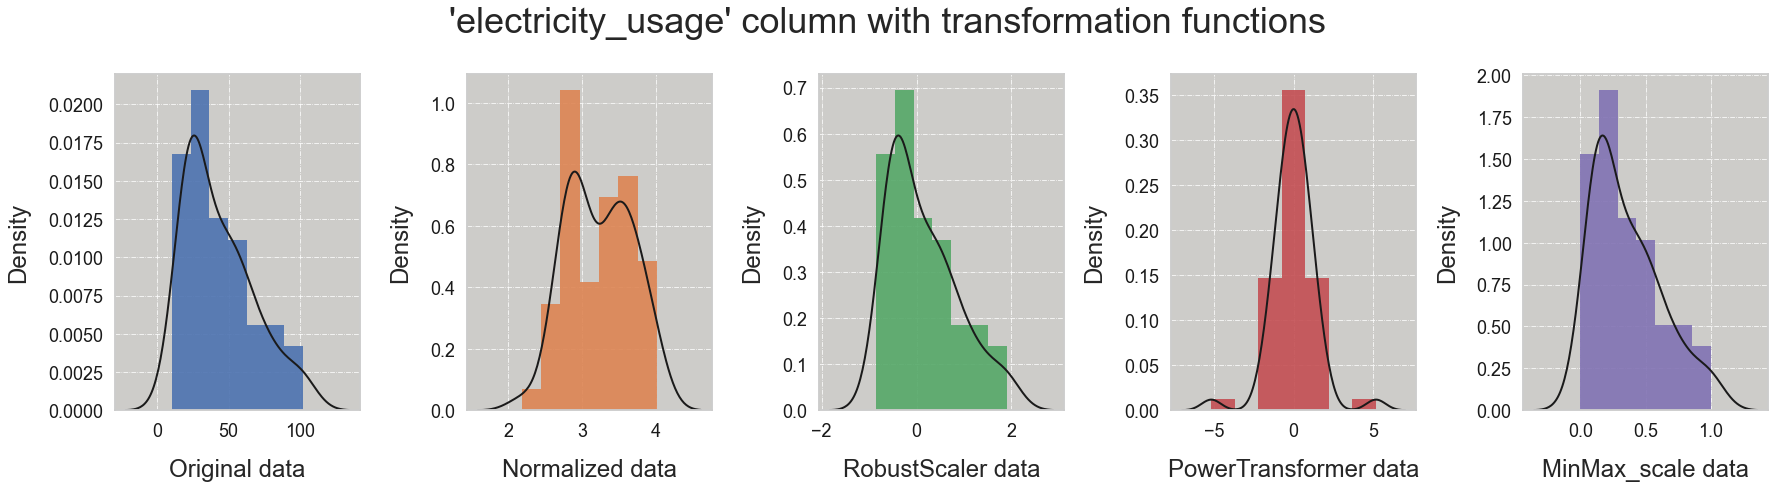

In [58]:
global_plot_sets()
fig, ax = plt.subplots(1, 5, figsize=(25, 7), sharey=False)

## Optimal number of bins
bin_num = int(np.sqrt(energy.shape[0]))

for i in range(0, df_transform_func.shape[1]):
    sns.histplot(data=df_transform_func, x=df_transform_func.columns[i], color=sns.color_palette('deep')[i],
                 edgecolor="none", alpha=0.9, bins=bin_num, ax=ax[i], stat='density')
    sns.kdeplot(data=df_transform_func, x=df_transform_func.columns[i], color='k',
                linewidth=2, alpha=1, ax=ax[i])

plt.suptitle("'electricity_usage' column with transformation functions", fontsize = 36, y=0.98)
plt.tight_layout()
#plt.show()

---

# Linear regression methods

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Calculate change in number of features

In [60]:
num_features = []
num_degr = [i for i in range(1, 11)]
for num in num_degr:
	# create transform
	poly_transf = PolynomialFeatures(degree=num)
	# fit and transform
	data = poly_transf.fit_transform(energy.iloc[:, :-1])
	# Notice number of features
	num_features.append(data.shape[1])
	# Conclusion
	print(f'For degree={num}, features number={data.shape[1]}')

For degree=1, features number=3
For degree=2, features number=6
For degree=3, features number=10
For degree=4, features number=15
For degree=5, features number=21
For degree=6, features number=28
For degree=7, features number=36
For degree=8, features number=45
For degree=9, features number=55
For degree=10, features number=66


### Features number grows quickly, so we will focus on only 1., 2. and 3. polynomial degree

In [61]:
## Library made for faster calculating data in Intel-based CPU (especially Xeon family)

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Polynomial function will have degrees between 1. and 4. - higher degree values could be a reason of overfitting the final model.
#### **Polynomial regression** (1. to 4. degrees)

In [62]:
def poly_regression(col, n):
    ## Preparing Dataframe for regressing analyse
    _ = pd.DataFrame(data={'temperature': energy['temperature'], 'y': col})
    X, y = energy.iloc[:, :-1], col

    # models using the pipeline
    model = Pipeline(steps=[('preprocess', PolynomialFeatures(degree=n)), 
                            ('model', LinearRegression(n_jobs=10))])

    ## Predict values for every degree number
    model.fit(X, y)
    y_pred = model.fit(X,y).predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred, multioutput = 'variance_weighted')

    ## Insert R2_score and y_pred values from all polynomial degrees into different Dataframe columns
    _['y_pred'] = y_pred
    _['R2'] = r2
    _['rmse'] = rmse
    _['poly_degree'] = n
    
    print(f'For degree={n}, R2={r2:.3f} and rmse={rmse:.3f}')       

    return _

In [63]:
def poly_params_concat(i):
    _ = df_transform_func.iloc[:, i]
    df_name = [poly_regression(_, degree) for degree in np.arange(1, 4)]
    return pd.concat(df_name).reset_index(drop=True)

In [64]:
poly_results_original = poly_params_concat(0)

poly_results_original.head()

For degree=1, R2=0.781 and rmse=11.146
For degree=2, R2=0.848 and rmse=9.261
For degree=3, R2=0.857 and rmse=9.004


,temperature,y,y_pred,R2,rmse,poly_degree
0,73,24.828,17.088223,0.780508,11.145542,1
1,67,24.688,25.220125,0.780508,11.145542,1
2,57,19.310,38.800991,0.780508,11.145542,1
3,43,59.706,57.830819,0.780508,11.145542,1
4,26,99.667,80.947371,0.780508,11.145542,1


In [65]:
poly_results_normalize = poly_params_concat(1)

poly_results_normalize.head()

For degree=1, R2=0.803 and rmse=0.193
For degree=2, R2=0.812 and rmse=0.189
For degree=3, R2=0.829 and rmse=0.180


,temperature,y,y_pred,R2,rmse,poly_degree
0,73,2.910033,2.746466,0.80296,0.193477,1
1,67,2.905406,2.902354,0.80296,0.193477,1
2,57,2.702787,3.160292,0.80296,0.193477,1
3,43,3.608529,3.520279,0.80296,0.193477,1
4,26,3.999050,3.956803,0.80296,0.193477,1


In [66]:
poly_results_quantile = poly_params_concat(3)

poly_results_quantile.head()

For degree=1, R2=0.567 and rmse=0.890
For degree=2, R2=0.597 and rmse=0.858
For degree=3, R2=0.608 and rmse=0.846


,temperature,y,y_pred,R2,rmse,poly_degree
0,73,-0.430727,-1.268843,0.566852,0.889508,1
1,67,-0.508488,-0.882036,0.566852,0.889508,1
2,57,-1.324958,-0.232641,0.566852,0.889508,1
3,43,0.764710,0.679344,0.566852,0.889508,1
4,26,1.786156,1.788269,0.566852,0.889508,1


## **Conclusion**: Optimal polynomial regression result were achieved by using original (non-transformed) data with ***n=3*** (3. degree polynomial function used).

### After making DataFrames we need to reorganize data by ascending order on x-axis (temperature) - only then it is possible to draw the plots with polynomial approximations properly.

In [67]:
def sorted_x_values(func, col, i):
    ## Only input (col) and output (y_pred)
    ## values from DataFrames are needed
    return func.loc[func['poly_degree']==i][[col, 'y_pred']]\
    .sort_values(col).reset_index(drop=True)

### Predictions for original and normalized data are shown in plot below

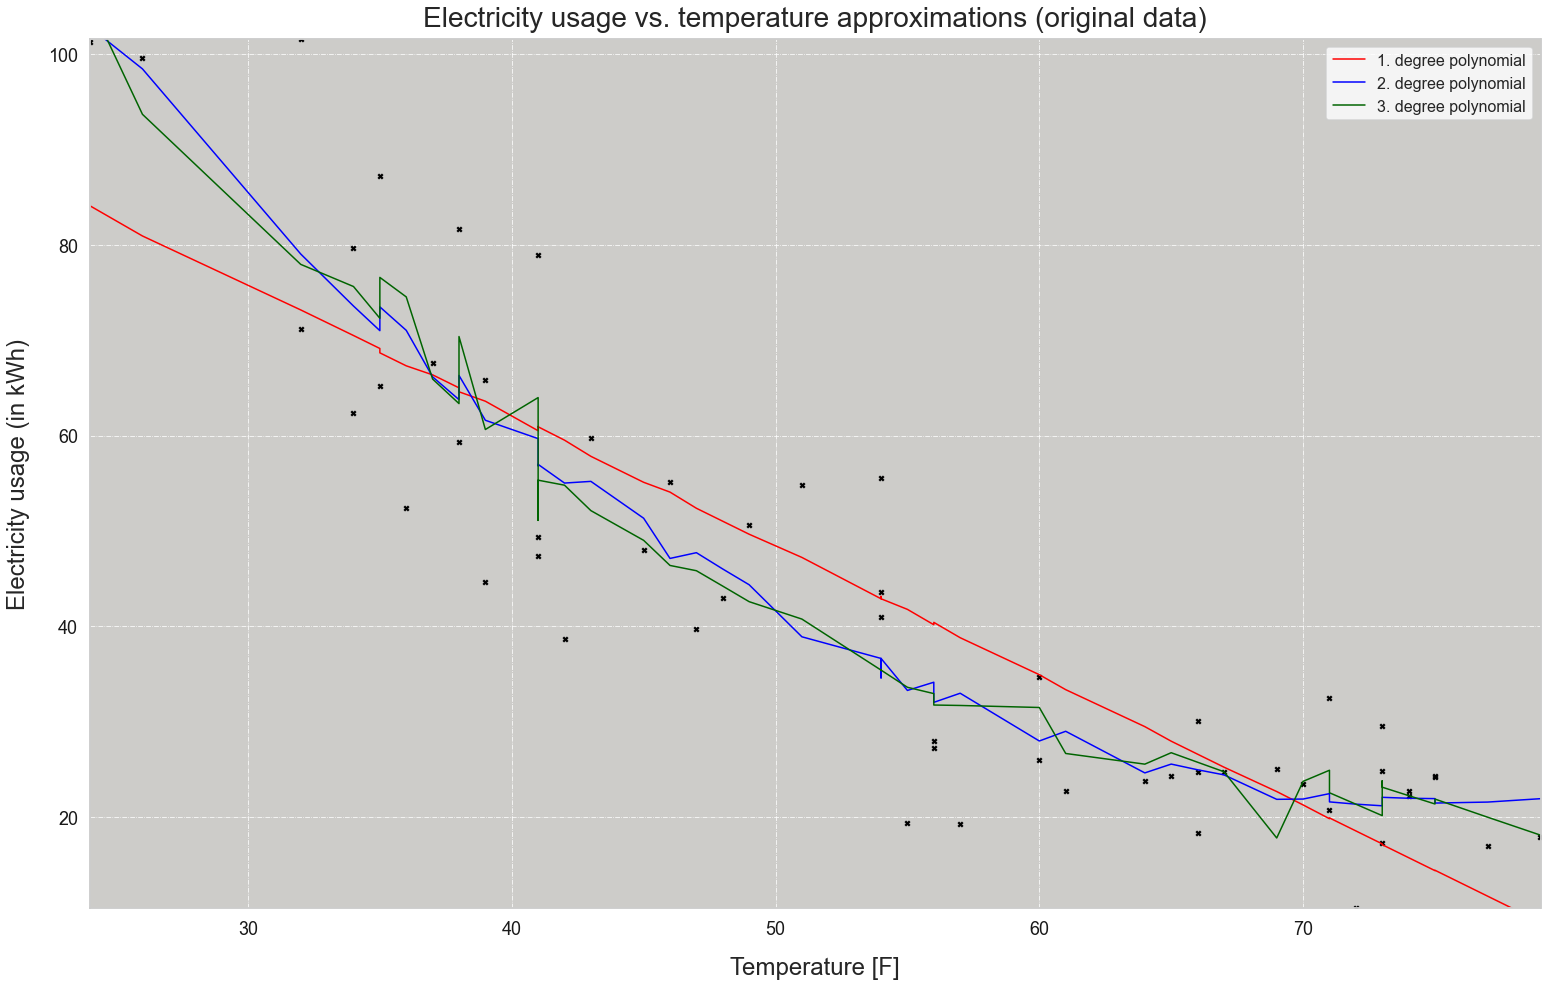

In [68]:
plt.figure(figsize=(26, 16))

poly_degree = np.arange(1, 4)
colors = ['red', 'blue', 'darkgreen']

for ind, colors in zip(poly_degree, colors):
    _ = sorted_x_values(poly_results_original, 'temperature', ind)
    #y = sorted_x_values(df_poly_original, 'y', ind)
    plt.plot(_['temperature'], _['y_pred'], lw = 1.5,
             color = colors, aa=True, label = f'{str(ind)}. degree polynomial')    


plt.scatter(energy['temperature'], energy['electricity_usage'], c = 'black', marker = 'x', s = 20)
plt.xlabel('Temperature [F]')
plt.ylabel('Electricity usage (in kWh)')
plt.xlim(energy['temperature'].min(), energy['temperature'].max())
plt.ylim(energy['electricity_usage'].min(), energy['electricity_usage'].max())
plt.title('Electricity usage vs. temperature approximations (original data)')
plt.legend()

plt.show()